# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.406730e+01     1.336025e+01
 * time: 0.005910158157348633
     1     6.488520e+01     8.933711e+00
 * time: 0.015846967697143555
     2     5.893213e+01     1.381415e+01
 * time: 0.03980398178100586
     3     4.191802e+01     9.940066e+00
 * time: 0.07469415664672852
     4     3.057740e+01     7.521273e+00
 * time: 0.10924315452575684
     5     2.139046e+01     5.027205e+00
 * time: 0.15752315521240234
     6     1.581984e+01     4.601487e+00
 * time: 0.1967329978942871
     7     1.290018e+01     7.009680e+00
 * time: 0.32505106925964355
     8     1.083488e+01     4.274382e+00
 * time: 0.3524150848388672
     9     7.964494e+00     3.343177e+00
 * time: 0.37688517570495605
    10     6.549273e+00     2.255038e+00
 * time: 0.4013330936431885
    11     6.188104e+00     2.128202e+00
 * time: 0.42254209518432617
    12     6.015400e+00     1.232296e+00
 * time: 0.4482300281524658
    13     5.931303e+00     1.247287e+00
 * time: 0

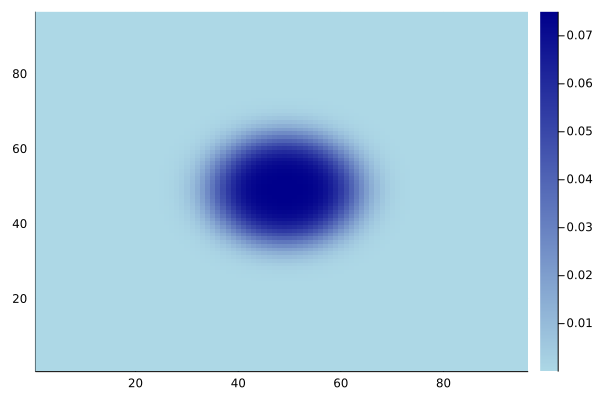

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))